# Height of all patients
We would like to create a histogram of the heights of all patients that were admitted to hospital. Hence, in this case we do not need to filter out patients younger than 16 years old. The height is registered by two different charted events, namely ‘Admit Ht’ (unique identifier 920) and ‘Height (cm)’ (unique identifier 226730).
### SQL query description
The query diagram is visualized below. Since we are interested in the heights of all patients and hence do not need to filter on age, we only need the Chartevents table.
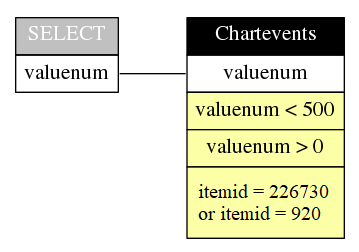

In [1]:
#imports:
import numpy as np
import pandas as pd
import sys
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib.colors as mc
import colorsys
import psycopg2
%matplotlib inline
# Configuration:
sqluser = 'postgres'
dbname = 'mimic'
password='postgres'
schema_name = 'mimiciii'
# Connect to MIMIC-III:
con = psycopg2.connect(dbname=dbname, user=sqluser, password=password)
cur = con.cursor()
cur.execute('SET search_path to ' + schema_name)

In [2]:
# Get the item ids related to height:
query ="""
SELECT d.itemid, d.label
FROM mimiciii.d_items d
WHERE d.label LIKE '%Height%' OR d.itemid = 920
"""

query_output = pd.read_sql_query(query,con)
query_output

,itemid,label
0,216,Height of Bed
1,920,Admit Ht
2,1394,Height Inches
3,226707,Height
4,226730,Height (cm)


In [3]:
query ="""
SELECT width_bucket(ce.valuenum, 1, 200, 200) as height, count(*)
FROM mimiciii.chartevents ce
WHERE ce.itemid in (920, 226730) AND ce.valuenum IS NOT NULL AND ce.valuenum > 0 AND ce.valuenum < 500
GROUP BY height
ORDER BY height;
"""

query_output = pd.read_sql_query(query, con)

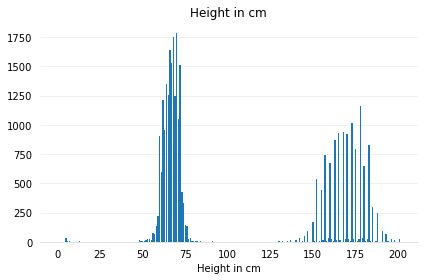

In [4]:
# Visualize:
fig, ax = plt.subplots()
bars = ax.bar(query_output['height'], query_output['count'])
plt.xlabel('Height in cm')
plt.title('Height in cm')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')
ax.tick_params(bottom=False, left=False)
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#EEEEEE')
ax.xaxis.grid(False)
bar_color = bars[0].get_facecolor()
plt.tight_layout()
fig.savefig('figures/height_histogram.jpg', dpi=400)